## Importing libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Data Loading

In [49]:
df = pd.read_csv("auction_cleaned.csv")

In [50]:
df.head()

,artist,country,yearofbirth,yearofdeath,name,year,price,material,height,width,...,highbrightnessperc,lowbrightnessperc,cornerper,edgeper,facecount,soldtime,area,sold_year,year_missing,sold_year_missing
0,Mario A,Swiss,1959,unknown,The world is beautyful #5,2004.0,5315.0,laserchrome_print_diasec,29.53,39.37,...,0.75,21.56,0.37,4.02,1.0,NaN,1162.5961,-1.0,0,1
1,Mario A,Swiss,1959,unknown,The world is beautyful #13,2004.0,7383.0,laserchrom_print_(diasec.),29.53,39.37,...,15.21,46.50,1.52,7.28,0.0,NaN,1162.5961,-1.0,0,1
2,A E Cremer,French,20thC,unknown,Spot Lights,-1.0,2090.0,black-painted_metal,19.88,20.00,...,0.00,17.56,0.39,4.15,0.0,NaN,397.6000,-1.0,1,1
3,A G Schultz & Co.,American,est1890s,unknown,Sugar/Sweetmeat Baskets,-1.0,615.0,sterling_silver,6.50,5.75,...,13.74,35.74,3.58,13.13,0.0,NaN,37.3750,-1.0,1,1
4,A G Schultz & Co.,American,est1890s,unknown,An American Silver Five-piece Tea And Coffee S...,1908.0,8125.0,silver,19.88,20.00,...,0.00,6.27,1.25,12.95,0.0,NaN,397.6000,-1.0,0,1


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40804 entries, 0 to 40803
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   artist              40804 non-null  object 
 1   country             40804 non-null  object 
 2   yearofbirth         40804 non-null  object 
 3   yearofdeath         40804 non-null  object 
 4   name                40804 non-null  object 
 5   year                40804 non-null  float64
 6   price               40804 non-null  float64
 7   material            40804 non-null  object 
 8   height              40804 non-null  float64
 9   width               40804 non-null  float64
 10  link                40804 non-null  object 
 11  source              40804 non-null  object 
 12  dominantcolor       40804 non-null  object 
 13  brightness          40804 non-null  float64
 14  ratiouniquecolors   40804 non-null  float64
 15  thresholdblackperc  40804 non-null  float64
 16  high

In [52]:
## Drop Irrelavant Columns

In [53]:
drop_cols = ['name', 'link', 'source', 'dominantcolor', 'soldtime']
df[drop_cols].head()

,name,link,source,dominantcolor,soldtime
0,The world is beautyful #5,http://artsalesindex.artinfo.com/asi/lots/3456055,http://artinfo-images-350.s3.amazonaws.com/asi...,yellows,NaN
1,The world is beautyful #13,http://artsalesindex.artinfo.com/asi/lots/3456059,http://artinfo-images-350.s3.amazonaws.com/asi...,blacks,NaN
2,Spot Lights,http://artsalesindex.artinfo.com/asi/lots/5250074,http://artinfo-images-350.s3.amazonaws.com/asi...,whites,NaN
3,Sugar/Sweetmeat Baskets,http://artsalesindex.artinfo.com/asi/lots/5269624,http://artinfo-images-350.s3.amazonaws.com/asi...,blacks,NaN
4,An American Silver Five-piece Tea And Coffee S...,http://artsalesindex.artinfo.com/asi/lots/3900522,http://artinfo-images-350.s3.amazonaws.com/asi...,whites,NaN


In [54]:
df = df.drop(columns=drop_cols)

## Target Variable

In [56]:
df['log_price'] = np.log1p(df['price'])

## Encoding Categorical Variables

In [58]:
artist_freq = df['artist'].value_counts().to_dict()
df['artist_score'] = df['artist'].map(artist_freq)
df['artist_score'].head()

## Explantion
# Instead of giving every artist a separate column (which explodes dimensions with thousands of artists), 
# we assign each artist a numerical score equal to how many times they appear in the dataset.
# Because the number of appearances acts as a proxy for reputation or market exposure.
# Frequency encoding gives a meaningful numeric signal tied to occurrence.

0    2
1    2
2    1
3    2
4    2
Name: artist_score, dtype: int64

In [59]:
## Label encoding
for col in ['country', 'material']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

## Explanation
# Convert text categories into integer codes (0, 1, 2, 3, …) so that ML models can read them.
# Models can’t process strings. Label encoding is simple and efficient when the category count is moderate (e.g., 10–50 values).

## Scaling Continuous Features

In [61]:
num_cols = ['area','brightness','ratiouniquecolors','highbrightnessperc',
            'lowbrightnessperc','cornerper','edgeper','facecount']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

## Explanation

# You have features measured in different units:
# - area = square inches (~thousands)
# - brightness = 0–255 scale
# - ratiouniquecolors = 0–1
# - edgeper = percentage (~0–100)

# If we feed them directly into models like Linear Regression, the large-scale features dominate smaller ones numerically.
# Scaling standardizes all numeric features so that each has: mean = 0, standard deviation = 1

In [62]:
df.head()

,artist,country,yearofbirth,yearofdeath,year,price,material,height,width,brightness,...,lowbrightnessperc,cornerper,edgeper,facecount,area,sold_year,year_missing,sold_year_missing,log_price,artist_score
0,Mario A,194,1959,unknown,2004.0,5315.0,4009,29.53,39.37,-0.954247,...,0.504312,-0.686356,-1.012415,2.481235,0.063918,-1.0,0,1,8.578476,2
1,Mario A,194,1959,unknown,2004.0,7383.0,4007,29.53,39.37,-1.443571,...,2.288847,-0.105690,-0.498196,-0.277766,0.063918,-1.0,0,1,8.907071,2
2,A E Cremer,135,20thC,unknown,-1.0,2090.0,738,19.88,20.00,1.277067,...,0.218099,-0.676258,-0.991909,-0.277766,-0.119986,-1.0,1,1,7.645398,1
3,A G Schultz & Co.,84,est1890s,unknown,-1.0,615.0,7527,6.50,5.75,-1.443571,...,1.518935,0.934459,0.424559,-0.277766,-0.206584,-1.0,1,1,6.423247,2
4,A G Schultz & Co.,84,est1890s,unknown,1908.0,8125.0,7415,19.88,20.00,1.355359,...,-0.589736,-0.242021,0.396166,-0.277766,-0.119986,-1.0,0,1,9.002824,2


## Top Factors that correlated with Price

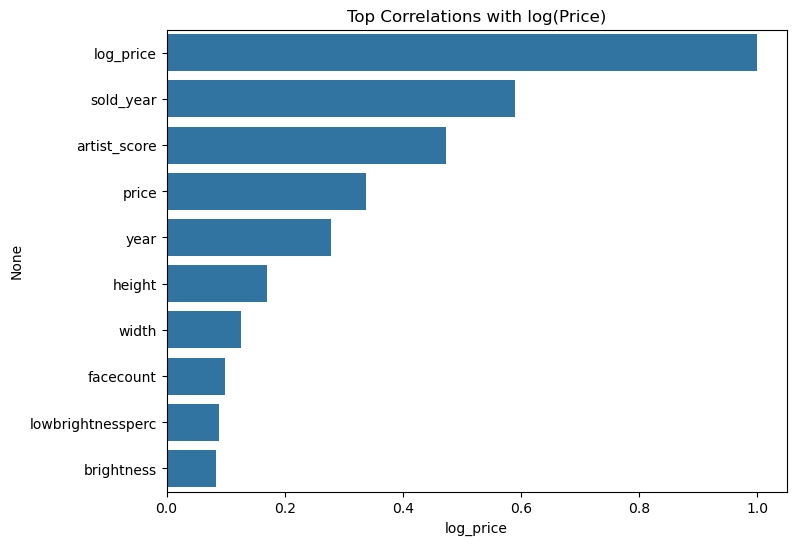

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)['log_price'].sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=corr.head(10), y=corr.head(10).index)
plt.title("Top Correlations with log(Price)")
plt.show()

In [65]:
import numpy as np
import pandas as pd

def parse_year(x):
    if isinstance(x, str):
        x = x.lower().strip()
        if x == 'unknown' or x == '' or x == 'nan':
            return np.nan
        if 'est' in x:
            # e.g. "est1890s" → 1890
            digits = ''.join([c for c in x if c.isdigit()])
            return float(digits[:4]) if digits else np.nan
        if 'thc' in x:
            # e.g. "20thC" → 1900 (rough century midpoint)
            century = int(''.join([c for c in x if c.isdigit()]))
            return 100 * (century - 1) + 50
        # regular year like "1959"
        try:
            return float(x)
        except:
            return np.nan
    return x

df['yearofbirth'] = df['yearofbirth'].apply(parse_year)
df['yearofdeath'] = df['yearofdeath'].apply(parse_year)

# Optional: fill NaNs with median century approximation
df['yearofbirth'] = df['yearofbirth'].fillna(df['yearofbirth'].median())
#df['yearofdeath'] = df['yearofdeath'].fillna(df['yearofdeath'].median())
df = df.drop(columns=['yearofdeath'])

#print(df[['yearofbirth', 'yearofdeath']].head())

## Train-Test Splits

In [67]:
# Splitting the dataset into 80% training and 2-% testing
X = df.drop(columns=['price','log_price'])
y = df['log_price']

# 1. Split train_full + test (80/20)
train_full_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# 2. Split train_full into validation and train (each 20%)
train_df, val_df = train_test_split(train_full_df, test_size=0.25, random_state=42)

print(f"Train: {len(train_df)}, Val: {len(val_df)}, Test: {len(test_df)}")

Train: 24482, Val: 8161, Test: 8161


## Saving the file for Modeling

In [69]:
df.to_csv("auction_model_ready.csv", index=False)
print("Model-ready dataset saved.")

Model-ready dataset saved.
